In [141]:
from numpy import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

sns.set_theme()

In [151]:
# Create some sample data and a sample dataframe
random.seed(0)
columns = list("abcdefghij")
sample_size = 20

df = pd.DataFrame(
    {c: random.randint(100, size=sample_size) for c in columns},
    index=pd.Series(range(sample_size), name="variable")
)
print(df.columns)
df

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


,a,b,c,d,e,f,g,h,i,j
variable,,,,,,,,,,
0,44,81,39,17,42,49,0,41,77,4
1,47,37,32,79,84,69,10,58,30,67
2,64,25,65,4,75,41,43,65,24,11
3,67,77,9,42,68,35,58,36,2,86
4,67,72,57,58,6,64,23,10,3,77
5,9,9,32,31,68,95,59,86,94,75
6,83,20,31,1,47,69,2,43,98,56
7,21,80,74,65,3,94,98,11,13,16
8,36,69,23,41,76,0,62,2,40,24


tag_1: e, tag_2: f, tag_3: g, tag_4: h, tag_5: i
tag_1: f, tag_2: g, tag_3: h, tag_4: i, tag_5: j


ValueError: Could not interpret value `No` for parameter `x`

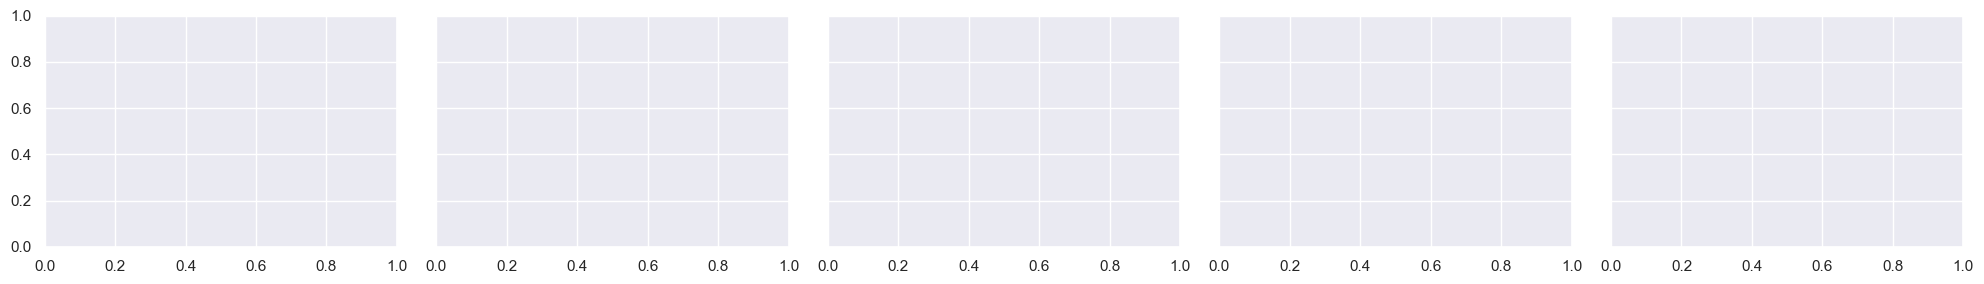

In [143]:
n=4
for tag_1,tag_2,tag_3,tag_4,tag_5 in zip(df.columns[n:], df.columns[n+1:], df.columns[n+2:], df.columns[n+3:], df.columns[n+4:]):
    print(f"tag_1: {tag_1}, tag_2: {tag_2}, tag_3: {tag_3}, tag_4: {tag_4}, tag_5: {tag_5}")
for tag_1,tag_2,tag_3,tag_4,tag_5 in zip(df.columns[n:], df.columns[n+1:], df.columns[n+2:], df.columns[n+3:], df.columns[n+4:]):
    fig,ax=plt.subplots(ncols=5, tight_layout=True, sharey=True, figsize=(20,3))
    sns.scatterplot(df, x="No", y=tag_1, ax=ax[0])
    sns.scatterplot(df, x="No", y=tag_2, ax=ax[1])
    sns.scatterplot(df, x="No", y=tag_3, ax=ax[2])
    sns.scatterplot(df, x="No", y=tag_4, ax=ax[3])
    sns.scatterplot(df, x="No", y=tag_5, ax=ax[4])
    plt.show()


In [152]:
df2 = (df
    .melt(value_vars=columns, var_name="tag", ignore_index=False)
    .reset_index()
)
df2

,variable,tag,value
0,0,a,44
1,1,a,47
2,2,a,64
3,3,a,67
4,4,a,67
...,...,...,...
195,15,j,83
196,16,j,33
197,17,j,32
198,18,j,70


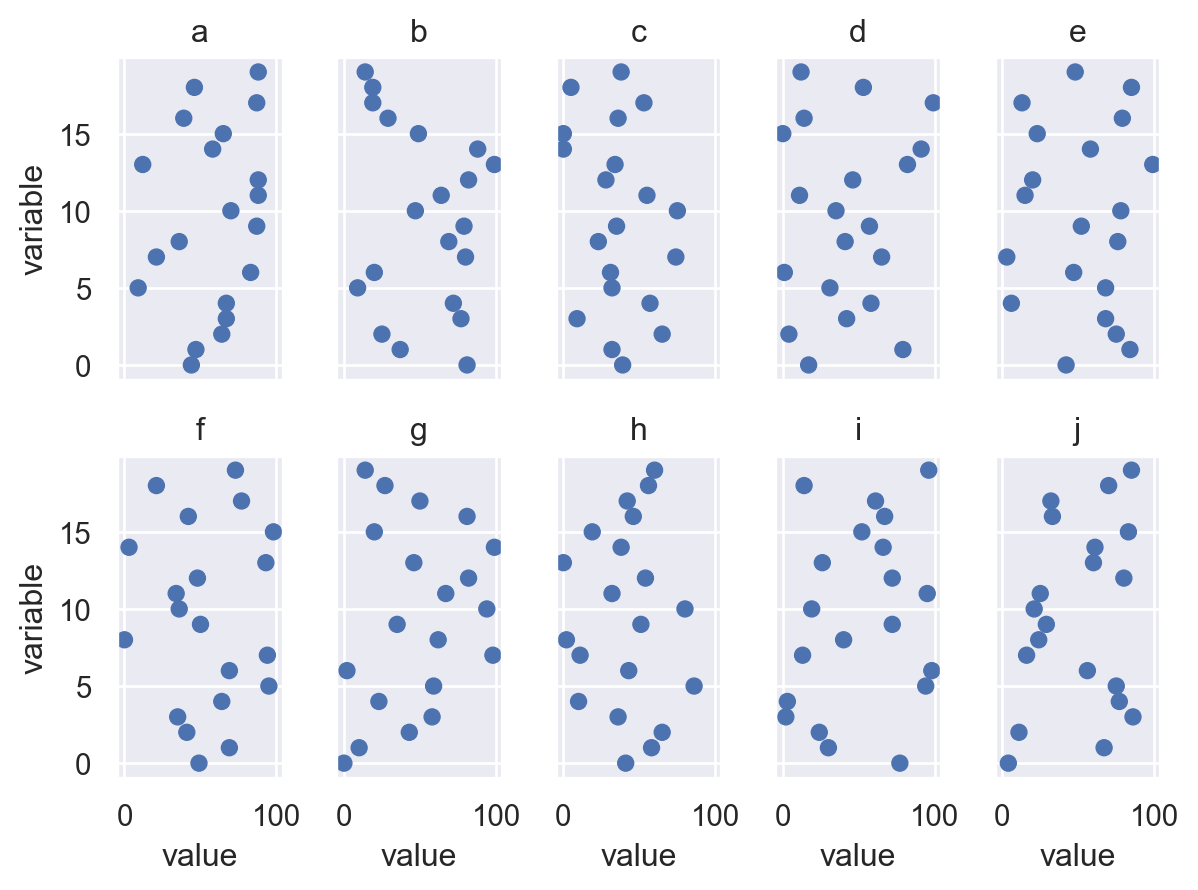

In [153]:
(
    so.Plot(df2, x="value", y="variable") # Or you might do x="No"
    .facet(col="tag", wrap=5)
    .add(so.Dot())
)